# Import all kind of stuff

In [1]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap, colors

from theory.models.bcs import Delta_meV_of_T
from theory.models.bcs import N_of_E
from theory.models.bcs import f_of_E
from theory.models.bcs import get_I_nA as get_I_nA_bcs

from theory.models.tg import get_I_pat_nA as get_I_nA_tg

from theory.models.constants import k_B_meV, G_0_muS, e, h

loaded constants...


# Set plot fontsizes

In [2]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["font.size"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

In [3]:
textwidth = 4.25279  # in
textheight = 6.85173

print(
    " 1.0",
    textwidth,
    textheight,
    "\n",
    "0.9",
    0.9 * textwidth,
    0.9 * textheight,
    "\n",
    "0.8",
    0.8 * textwidth,
    0.8 * textheight,
    "\n",
    "0.7",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.6",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.5",
    0.5 * textwidth,
    0.5 * textheight,
    "\n",
    "0.4",
    0.4 * textwidth,
    0.4 * textheight,
    "\n",
)

 1.0 4.25279 6.85173 
 0.9 3.8275110000000003 6.166557 
 0.8 3.402232 5.481384 
 0.7 2.976953 4.796211 
 0.6 2.976953 4.796211 
 0.5 2.126395 3.425865 
 0.4 1.701116 2.740692 



# Josephson $I(V)$

In [4]:
Delta_meV = 0.18
Gamma_meV = 0.0
T_K = 0.0
V_0 = np.linspace(0, 3.08, 281)
tau = 0.001
I_C = np.pi / 2
I_J = np.sin(2 * np.pi / 18) * I_C

In [5]:
from theory.models.bcs import get_I_nA as get_I_nA_bcs

I_bcs = get_I_nA_bcs(
    V_mV=V_0 * Delta_meV,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    Gamma_meV=Gamma_meV,
) / (Delta_meV * G_0_muS * tau)
I = np.concatenate((np.array([0.0, I_C]), I_bcs))
V = np.concatenate((np.array([0.0, 0.0]), V_0))

I = np.concatenate((-np.flip(I), I))
V = np.concatenate((-np.flip(V), V))

V_mV = V * Delta_meV

https://en.wikipedia.org/wiki/Josephson_effect#/media/File:I-V_characteristics_of_Josephson_Junction.JPG

1.7 1.2 0.3 0.3
Bbox(x0=0.17647058823529413, y0=0.25, x1=1.0, y1=1.0)


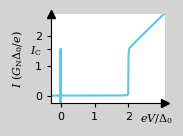

In [6]:
fig = plt.figure(figsize=(1.7, 1.2), facecolor="lightgrey")
w, h = fig.get_size_inches()
x_0, y_0 = 0.3, 0.3
ax = fig.add_axes([x_0 / w, y_0 / h, (w - x_0) / w, (h - y_0) / h])

print(w, h, x_0, y_0)
print(ax.get_position())

ax.plot(
    V,
    I,
    color=colors(0),
)

ax.set_xlim([-0.28, 3.08])
ax.set_xticks([0, 1, 2], labels=["0", "1", "2"])

ax.set_ylim([-0.25, 2.75])
ax.set_yticks([0, 1, 2, I_C], labels=["0", "1", "2", "$I_\\mathrm{C}$"])

xlabel = "$eV/\\Delta_0$"
ylabel = "$I\\ (G_\\mathrm{N}\\Delta_0/e)$"
title = "josephson-iv"


# region figure stuff v1

# layout definition
pads_label = (0.4, 0.15)
pads_0 = (0.08, 0.08)

# get parameter
fig_w, fig_h = fig.get_size_inches()
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

# algebra stuff
w, h = fig_w - (pads_label[0] + 2 * pads_0[0]), fig_h - (pads_label[1] + 2 * pads_0[1])
x_off = pads_label[0] + pads_0[0]
y_off = pads_label[1] + pads_0[1]
x_pos = (x_off / fig_w, w / fig_w)
y_pos = (y_off / fig_h, h / fig_h)
x_len = np.abs(x_lim[1] - x_lim[0])
y_len = np.abs(y_lim[1] - y_lim[0])

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)

# make layout
ax.set_position([x_pos[0], y_pos[0], x_pos[1], y_pos[1]])

# labels
ax.text(
    x_lim[1] + pads_0[0] / w * x_len,
    y_lim[0] - y_off / h * y_len,
    xlabel,
    ha="right",
    va="bottom",
    fontsize=8,
)
ax.set_ylabel(ylabel)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

# save figure
fig.savefig(f"{title}.pgf")
fig.savefig(f"{title}.pdf")

# endregion

# Josephson $I(\phi)$

In [7]:
phi = np.linspace(0, 2 * np.pi, 361)
I_J_phi = np.sin(phi)

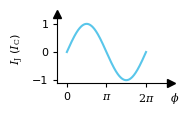

In [8]:
fig = plt.figure(figsize=(1.7, 1.0))
ax = fig.add_axes([0.3, 0.3, 1.0, 1.0])  # left, bottom, width, height

ax.plot(
    phi,
    I_J_phi,
    color=colors(0),
)

ax.set_ylim((-1.1, 1.35))
ax.set_yticks([0, 1, -1])

ax.set_xlim([-0.24 * np.pi, 2.64 * np.pi])
ax.set_xticks([0, np.pi, 2 * np.pi], labels=["0", "$\\pi$", "$2\\pi$"])

xlabel = "$\\phi$"
ylabel = "$I_\\mathrm{J}$ ($I_\\mathrm{C}$)"
title = "josephson-iphi"


# region figure stuff v1

# layout definition
pads_label = (0.4, 0.15)
pads_0 = (0.08, 0.08)

# get parameter
fig_w, fig_h = fig.get_size_inches()
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

# algebra stuff
w, h = fig_w - (pads_label[0] + 2 * pads_0[0]), fig_h - (pads_label[1] + 2 * pads_0[1])
x_off = pads_label[0] + pads_0[0]
y_off = pads_label[1] + pads_0[1]
x_pos = (x_off / fig_w, w / fig_w)
y_pos = (y_off / fig_h, h / fig_h)
x_len = np.abs(x_lim[1] - x_lim[0])
y_len = np.abs(y_lim[1] - y_lim[0])

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)

# make layout
ax.set_position([x_pos[0], y_pos[0], x_pos[1], y_pos[1]])

# labels
ax.text(
    x_lim[1] + pads_0[0] / w * x_len,
    y_lim[0] - y_off / h * y_len,
    xlabel,
    ha="right",
    va="bottom",
    fontsize=8,
)
ax.set_ylabel(ylabel)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

# save figure
fig.savefig(f"{title}.pgf")
fig.savefig(f"{title}.pdf")

# endregion

# Josephson $I(t)$

In [9]:
from theory.models.constants import e, h

Delta_meV = 0.180
t_ps = np.linspace(0, 30, 1001)  # ns
V_mV = np.array([Delta_meV])
I_C = np.pi / 2
phi_0 = 0.0

nu_0_GHz = 2 * e / h * V_mV * 1e-3 * 1e-9

phi = np.zeros((t_ps.shape[0], V_mV.shape[0]))
for i, v_mV in enumerate(V_mV):
    phi[:, i] = phi_0 + 2 * np.pi * nu_0_GHz[i] * t_ps * 1e-3

I_J = I_C * np.sin(phi)

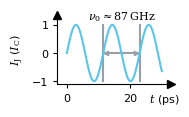

In [10]:
fig = plt.figure(figsize=(1.7, 1.0))
ax = fig.add_axes([0.3, 0.3, 1.0, 1.0])  # left, bottom, width, height

for i, v_mV in enumerate(V_mV):
    ax.plot(
        t_ps,
        I_J[:, i] / I_C,
        color=colors(0),
        zorder=10,
    )
t_0 = 1e3 / nu_0_GHz[0]
ax.plot([t_0, 2 * t_0], [0, 0], "-", color=colors(2))
ax.plot([t_0, t_0], [-1, 1], "-", color=colors(2))
ax.plot([2 * t_0, 2 * t_0], [-1, 1], "-", color=colors(2))
ax.plot([2 * t_0 - 1], [0], ">", color=colors(2), clip_on=False, ms=3)
ax.plot([t_0 + 1], [0], "<", color=colors(2), clip_on=False, ms=3)
ax.text(
    t_0 * 1.5,
    1.3,
    "$\\nu_0 \\approx 87\\,\\mathrm{GHz}$",
    color="k",
    ha="center",
    va="center",
    fontsize=8,
)

ax.set_ylim((-1.1, 1.35))
ax.set_yticks([0, 1, -1])

ax.set_xlim([-3, 33])
ax.set_xticks([0, 20])

xlabel = "$t$ (ps)"
ylabel = "$I_\\mathrm{J}$ ($I_\\mathrm{C}$)"
title = "josephson-it"

# region figure stuff v1

# layout definition
pads_label = (0.4, 0.15)
pads_0 = (0.08, 0.08)

# get parameter
fig_w, fig_h = fig.get_size_inches()
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

# algebra stuff
w, h = fig_w - (pads_label[0] + 2 * pads_0[0]), fig_h - (pads_label[1] + 2 * pads_0[1])
x_off = pads_label[0] + pads_0[0]
y_off = pads_label[1] + pads_0[1]
x_pos = (x_off / fig_w, w / fig_w)
y_pos = (y_off / fig_h, h / fig_h)
x_len = np.abs(x_lim[1] - x_lim[0])
y_len = np.abs(y_lim[1] - y_lim[0])

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)

# make layout
ax.set_position([x_pos[0], y_pos[0], x_pos[1], y_pos[1]])

# labels
ax.text(
    x_lim[1] + pads_0[0] / w * x_len,
    y_lim[0] - y_off / h * y_len,
    xlabel,
    ha="right",
    va="bottom",
    fontsize=8,
)
ax.set_ylabel(ylabel)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

# save figure
fig.savefig(f"{title}.pgf")
fig.savefig(f"{title}.pdf")

# endregion

# $I_C(T)$ Ambegaokar-Baratoff

In [11]:
Delta_0_meV = 0.18
T_C_K = Delta_0_meV / (1.764 * k_B_meV)
T_K = np.linspace(0, T_C_K, 101)
Delta_T_meV = np.zeros_like(T_K)
for i, T in enumerate(T_K):
    Delta_T_meV[i] = Delta_meV_of_T(Delta_meV=Delta_0_meV, T_K=T)
I_C_nA = np.pi / 2 * Delta_0_meV
I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA
I_C_lin = (T_C_K - T_K) * 635e-3 / I_C_nA
I_C_lin[I_C_lin > 1.0] = np.nan

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_45189/3616836601.py:8: RuntimeWarning: divide by zero encountered in divide
  I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA


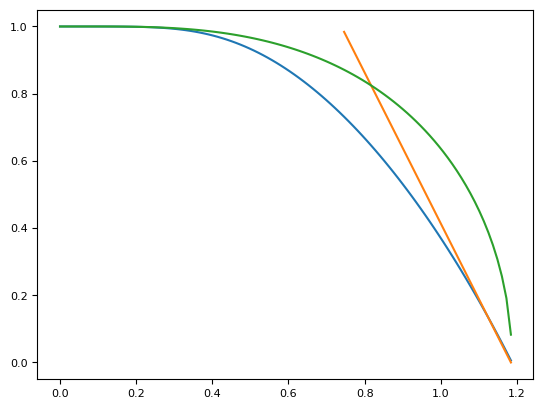

In [12]:
plt.plot(T_K, I_C_AB)
plt.plot(T_K, I_C_lin)
plt.plot(T_K, Delta_T_meV / Delta_0_meV)

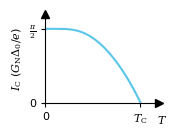

In [13]:
fig = plt.figure(figsize=(1.7, 1.2))
ax = fig.add_axes([0.3, 0.3, 1.0, 1.0])  # left, bottom, width, height

# Plot the simplified gap curve
ax.plot(T_K / T_C_K, I_C_AB, color=colors(0))
color = "k"  # colors(2)

ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)
ax.set_yticks([0, 1], labels=["0", "$\\frac{\\pi}{2}$"])
ax.set_xticks([0, 1], labels=["0", "$T_\\mathrm{C}$"])

xlabel = "$T$"
ylabel = "$I_\\mathrm{C}$ ($G_\\mathrm{N}\\Delta_0/e$)"
title = "critical-current"


# region figure stuff v1

# layout definition
pads_label = (0.4, 0.15)
pads_0 = (0.08, 0.08)

# get parameter
fig_w, fig_h = fig.get_size_inches()
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

# algebra stuff
w, h = fig_w - (pads_label[0] + 2 * pads_0[0]), fig_h - (pads_label[1] + 2 * pads_0[1])
x_off = pads_label[0] + pads_0[0]
y_off = pads_label[1] + pads_0[1]
x_pos = (x_off / fig_w, w / fig_w)
y_pos = (y_off / fig_h, h / fig_h)
x_len = np.abs(x_lim[1] - x_lim[0])
y_len = np.abs(y_lim[1] - y_lim[0])

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)

# make layout
ax.set_position([x_pos[0], y_pos[0], x_pos[1], y_pos[1]])

# labels
ax.text(
    x_lim[1] + pads_0[0] / w * x_len,
    y_lim[0] - y_off / h * y_len,
    xlabel,
    ha="right",
    va="bottom",
    fontsize=8,
)
ax.set_ylabel(ylabel)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

# save figure
fig.savefig(f"{title}.pgf")
fig.savefig(f"{title}.pdf")

# endregion

# Shapiro Stufen & PAT I(V)

In [78]:
# generate data
from theory.models.bcs import get_I_nA as get_I_nA_bcs
from theory.models.tg import get_I_pat_nA as get_I_nA_tg

Delta_meV = 0.180
V_mV = np.linspace(0, 2.5, 601) * Delta_meV  # mV
A_mV = np.array([0, 0.1, 0.2]) * Delta_meV  # mV
tau = 1
T_K = 0.0
Gamma_meV = 0.0
nu_GHz = 5.0

I_BCS = np.full((A_mV.shape[0], V_mV.shape[0]), np.nan)

I_BCS = get_I_nA_bcs(
    V_mV=V_mV,
    tau=tau,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    Gamma_meV=Gamma_meV,
)
I_PAT = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=I_BCS, nu_GHz=nu_GHz)

dIdV_PAT = np.gradient(I_PAT, V_mV, axis=1) / G_0_muS

I_PAT /= Delta_meV * G_0_muS

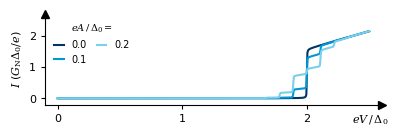

In [71]:
fig, ax = plt.subplots(figsize=(3.8, 1.2))

for i, A in enumerate(A_mV):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        I_PAT[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(A_mV)),
        zorder=i,
        label=f"{A/Delta_meV:1.1f}",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_ylim(-0.2, 2.7)
ax.set_yticks([0, 1, 2])
ax.set_xticks([0, 1, 2])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$I$ ($G_\\mathrm{N}\\Delta_0 /e$)")

ax.legend(
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=2,
    columnspacing=1.0,
)

fig.tight_layout(pad=0.1)
fig.savefig("shapiro-iv.pgf")
fig.savefig("shapiro-iv.pdf")

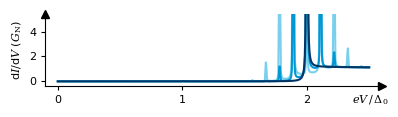

In [73]:
fig, ax = plt.subplots(figsize=(3.8, 1.0))

for i, A in enumerate(A_mV):
    ax.plot(
        V_mV / Delta_meV,
        dIdV_PAT[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(A_mV)),
        zorder=10 - i,
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.4, 5.4)
ax.set_yticks([0, 2, 4])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("d$I/$d$V$ ($G_\\mathrm{N}$)")

fig.tight_layout(pad=0.1)
fig.savefig("shapiro-didv.pgf")
fig.savefig("shapiro-didv.pdf")

In [ ]:
I = np.array([0, 0.33, 0.66, 1.0])
phi = np.linspace(-10 * np.pi, 10 * np.pi, 201)
U_phi = np.zeros((phi.shape[0], I.shape[0]))
for j, i in enumerate(I):

    U_phi[:, j] = -np.cos(phi) - i * phi

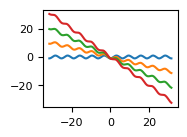

In [97]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.7, 1.2),
)

for j, i in enumerate(I):
    plt.plot(phi, U_phi[:, j])

fig.tight_layout(pad=0.1)
fig.savefig("washboard.pgf")
fig.savefig("washboard.pdf")

In [ ]:
from theory.models.bcs import get_I_nA as get_I_nA_bcs

Delta_meV = 0.18
Gamma_meV = 0.0
T_K = 0.0
tau = 1.0
I_C = np.pi / 2
I_sw = I_C / 2
I_r = I_C / 4
V = np.linspace(0, 2.5, 601)
V_mV = V * Delta_meV  # mV

I_BCS = get_I_nA_bcs(
    V_mV=V_mV,
    tau=tau,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    Gamma_meV=Gamma_meV,
) / (Delta_meV * G_0_muS)

I_JJ = V_mV / Delta_meV * 15
I_PD = V_mV / Delta_meV * 0.03

I_SW = np.copy(I_JJ)
I_SW[I_SW > I_sw] = I_sw - I_PD[I_SW > I_sw]
I_SW[I_BCS > I_SW] = I_BCS[I_BCS > I_SW]

I_R = np.copy(I_JJ)
I_R[I_R > I_r] = I_r + I_PD[I_SW > I_r]
I_R[I_BCS > I_R] = I_BCS[I_BCS > I_R]

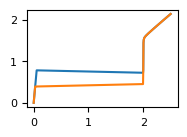

In [144]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.7, 1.2),
)

ax.plot(V, I_SW)
ax.plot(V, I_R)

fig.tight_layout(pad=0.1)
fig.savefig("rcsj-iv.pgf")
fig.savefig("rcsj-iv.pdf")